## Intro to stats
### Why we do what we do 
#### Fundamentals of modelling, data sampling and model simulation

In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### What is probability?

Suppose you were to flip a coin. Then you expect not to be able to say whether the next toss would yield a heads or a tails.  You might tell a friend that the odds of getting a heads is equal to to the odds of getting a tails, and that both are $1/2$.

This intuitive notion of odds is a **probability**. 

Consider another example. If we were tossing a 'fair' six-sided dice, we may thus equivalently say that the odds of the dice falling on any one of its sides is $1/6$. Indeed if there are $C$ different equally likely possibilities, we'd expect that the probability of any one particular outcome would be $1/C$.

The examples of the coin as well as the dice illustrate the notion of probability springing from **symmetry**. Here we think of probability of of the number 4 on the dice as the ratio:

$$\frac{Number\: of\: cases\: for\: number\: 4}{number\: of\: possibilities} = \frac{1}{6},$$
 assuming equally likely possibilities.



#### Probability from a model

But now think of an event like an election, say a presidential election. You cant exactly run multiple trials of the election: its a one-off event. But you still want to talk about the likelyhood of a candidate winning. However people do make **models** of elections, based on inputs such as race, age, income, sampling polls, etc. They assign likelihoods of candidates winning and run large numbers of **simulations** of the election, making predictions based on that. Forecasters like Nate Silver, Sam Wang, And Drew Linzer, made incredibly successfull predictions of the 2012 elections.

Or consider what a weather forecaster means when he or she says there is a 90% chance of rain today. Presumably, this conclusion has been made from many computer **simulations** which take in the weather conditions known in the past, and propagated using physics to the current day. The simulations give different results based on the uncertainty in the measurement of past weather, and the inability of the physics to capture the phenomenon exactly (all physics is some approximation to the natural world). But 90% of these simulations show rain.

In all of these cases, there is either a model (a fair coin, an election forecasting model, a weather differential equation), or an experiment ( a large number of coin tosses) that is used to **estimate** a probability, or the odds, of an **event** $E$ occuring. 


### Testing a model

We can test the model of a fair coin by having carried out a large number of coin flips. You would do, or imagine doing, a large number of flips or **trials** $N$, and finding the number of times you got heads $N_H$. Then the probability of getting heads would be 
$$\frac{N_H}{N}.$$

#### Probability as frequency

But, if you didnt know about the fairness of the coin, you can think of another notion probability as a **relative frequency**: if there are multiple ways an **event** like the tossing of a coin can happen, lets look at multiple trials of the event and see the fraction of times one or other of these ways happened. 

#### Simulating the results of the model
## Monte Carlo simulation
We dont have a coin right now. So let us **simulate** this process on a computer. To do this we will use a form of the **random number generator** built into `numpy`. In particular, we will use the function `np.random.choice`, which will with equal probability for all items pick an item from a list (thus if the list is of size 6, it will pick one of the six list items each time, with a probability 1/6). 

In [2]:
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)
throws=throw_a_coin(40)
print "Throws:"," ".join(throws)
print "Number of Heads:", np.sum(throws=='H')
print "p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.

Throws: H T H T H T T T H H T H H T T T T H T H H H T T T H H T H T H H H T T H T H H T
Number of Heads: 20
p1 = Number of Heads/Total Throws: 0.5


Notice that you do not necessarily get 20 heads.

Now say that we run the entire process again, a second **replication** to obtain a second sample. Then we ask the same question: what is the fraction of heads we get this time? Lets call the odds of heads in sample 2, then, $p_2$:

Let's do many more trials

In [3]:
throws=throw_a_coin(10000)
print "Number of Heads:", np.sum(throws=='H')
print "p for 10,000 = Number of Heads/Total Throws:", np.sum(throws=='H')/10000.

Number of Heads: 5007
p for 10,000 = Number of Heads/Total Throws: 0.5007


The larger number of trials we do, the closer we seem to get to half the tosses showing up heads. Lets see this more systematically:

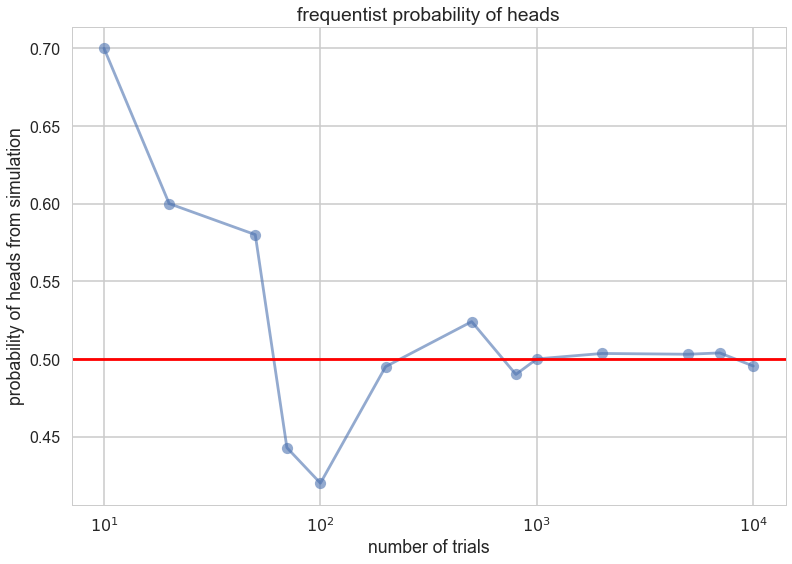

In [4]:
trials=[10, 20, 50, 70, 100, 200, 500, 800, 1000, 2000, 5000, 7000, 10000]
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.6);
plt.xscale("log")
plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('frequentist probability of heads');

Thus, the true odds **fluctuate** about their long-run value of 0.5, in accordance with the model of a fair coin (which we encoded in our simulation by having `np.random.choice` choose between two possibilities with equal probability), with the fluctuations becoming much smaller as the number of trials increases. These **fluctations** are what give rise to probability distributions.

Each finite length run is called a **sample**, which has been obtained from the **generative** model of our fair coin. Its called generative as we can use the model to generate, using simulation, a set of samples we can play with to understand a model. 

This is an example of a very important theorem in statistics, the law of large numbers, which says this:

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables. Suppose that $X$ has the finite mean $\mu$. Then the average of the first n of them:**

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to the mean of the variables $\mu$ as $n \to \infty$:**

$$ S_n \to \mu \, as \, n \to \infty. $$

The law of large numbers is what makes the **frequentist** interpretation of probability possible. For consider any event $E$ from a probability distribution with random variable Y, and consider the indicator function $I_E$ such that:

\begin{eqnarray*}
I_E(y) = 1 \,&& if \, y \in E\\
I_E(y) = 0 \,&&  otherwise
\end{eqnarray*}

The variable $Z=I_E(Y)$ is now Bernoulli random variable with parameter and thus p = P(E). Now if we take a long sequence from $Y$ and thus $Z$, then the frequency of successes (where success means being in E) will converge by the law of large numbers to the true probability p.

## FREQUENTIST STATISTICS 

In frequentist statistics, the data we have in hand, is viewed as a **sample** from a population. So if we want to estimate some parameter of the population, like say the mean, we estimate it on the sample.

This is because we've been given only one sample. Ideally we'd want to see the population, but we have no such luck.

The parameter estimate is computed by applying an estimator $F$ to some data $D$, so $\est{\mu} = F(D)$. 


**The parameter is viewed as fixed and the data as random, which is the exact opposite of the Bayesian approach. **

Consider some larger population from which this sample is drawn, there is some true $\trueval{\mu}$ which defines it. We dont know this. The best we can do to start with is to estimate  a ${\mu}$ from the data set we have, which we denote $\est{\mu}$. 

Now, imagine that I let you peek at the entire population in this way: I gave you some M data sets **drawn** from the population, and you can now find the mean on each such dataset, of which the one we have here is one.
So, we'd have M means. You can think of these means as coming from some fixed parameter by some data drawing process

Now if we had many replications of this data set: that is, data from other days, an **ensemble** of data sets, for example, we can compute other $\est{\mu}$, and begin to construct the **sampling distribution** of $\mu$.

#### The notion of a Sampling Distribution

In data science, we are always interested in understanding the world from incomplete data, in other words from a sample or a few samples of a population at large. Our experience with the world tells us that even if we are able to repeat an experiment or process, we will get more or less different answers the next time. If all of the answers were very different each time, we would never be able to make any predictions.

But some kind of answers differ only a little, especially as we get to larger sample sizes. So the important question then becomes one of the distribution of these quantities from sample to sample, also known as a **sampling distribution**. 

Since, in the real world, we see only one sample, this distribution helps us do **inference**, or figure the uncertainty of the estimates of quantities we are interested in. If we can somehow cook up samples just somewhat different from the one we were given, we can calculate quantities of interest, such as the mean on each one of these samples. By seeing how these means vary from one sample to the other, we can say how typical the mean in the sample we were given is, and whats the uncertainty range of this quantity. This is why the mean of the sample means is an interesting quantity; it characterizes the **sampling distribution of the mean**, or the distribution of sample means.

We can see this mathematically by writing the mean or expectation value of the sample means thus:

$$E_{\{R\}}(N\,\bar{x}) = E_{\{R\}}(x_1 + x_2 + ... + x_N) = E_{\{R\}}(x_1) + E_{\{R\}}(x_2) + ... + E_{\{R\}}(x_N)$$

Now in the limit of a very large number of replications, each of the expectations in the right hand side can be replaced by the population mean using the law of large numbers! Thus:

\begin{eqnarray*}
E_{\{R\}}(N\,\bar{x}) &=& N\, \mu\\
E(\bar{x}) &=& \mu
\end{eqnarray*}

which tells us that in the limit of a large number of replications the expectation value of the sampling means converges to the population mean. This limit gives us the true sampling distribution, as opposed to what we might estimate from our finite set of replicates.

### Samples from a population of coin flips

Lets redo the experiment with coin flips that we started in the previous lab. We'll establish some terminology at first. What we did there was to do a large set of replications M, in each of which we did many coin flips N.  We'll call the result of each coin flip an observation, and a single replication a sample of observations. Thus the number of samples is M, and the sample size is N. These samples have been chosen from a population of size $n >> N$.

In [5]:
def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=(throw_a_coin(sample_size)=='H')
    return np.mean(start, axis=1)

Let us now do 200 replications, each of which has a sample size of 1000 flips, and store the 200 means for each sample zise from 1 to 1000 in `sample_means`.

In [6]:
sample_sizes=np.arange(1,1001,1)
sample_means = [make_throws(number_of_samples=200, sample_size=i) for i in sample_sizes]

(0.48, 0.52)

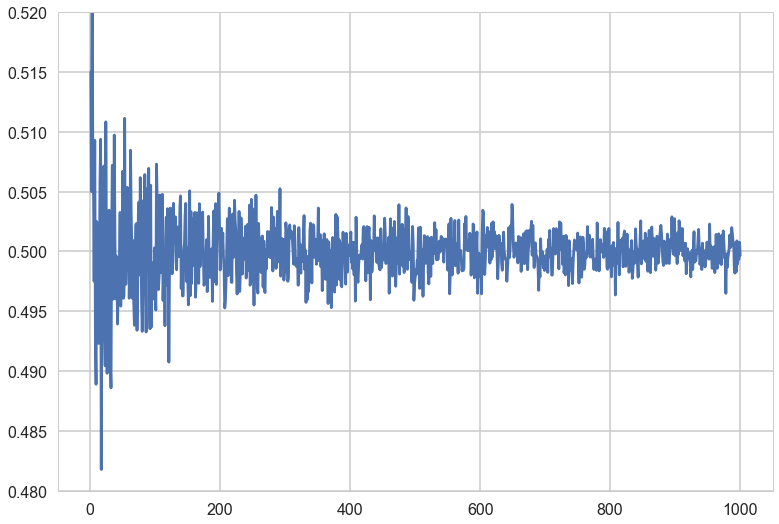

In [7]:
mean_of_sample_means = [np.mean(means) for means in sample_means]
plt.plot(sample_sizes, mean_of_sample_means)
plt.ylim([0.480,0.520])

Not surprisingly, the mean of the sample means converges to the distribution mean as the sample size N gets very large.

#### The sampling distribution as a function of sample size
We can see what the estimated sampling distribution of the mean looks like at different sample sizes.

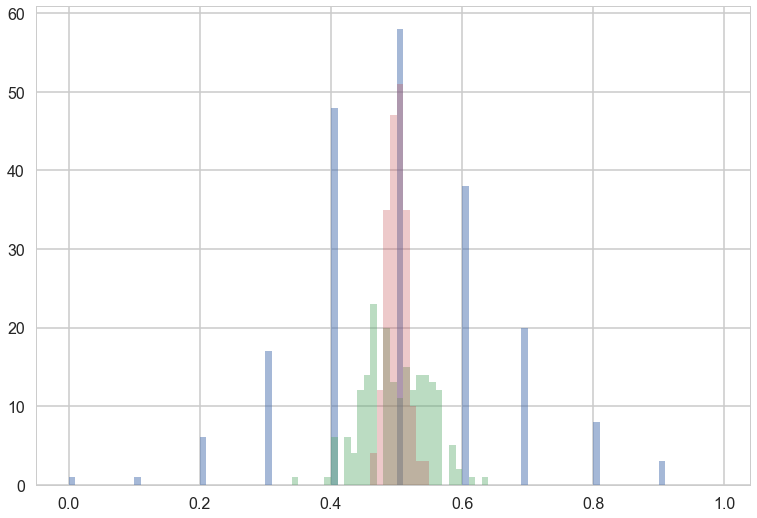

In [8]:
sample_means_at_size_10=sample_means[9]
sample_means_at_size_100=sample_means[99]
sample_means_at_size_1000=sample_means[999]
plt.hist(sample_means_at_size_10, bins=np.arange(0,1,0.01), alpha=0.5);
plt.hist(sample_means_at_size_100, bins=np.arange(0,1,0.01), alpha=0.4);
plt.hist(sample_means_at_size_1000, bins=np.arange(0,1,0.01), alpha=0.3);

The distribution is much tighter at large sample sizes, and that you can have way low and way large means at small sample sizes. Indeed there are means as small as 0.1 at a sample size of 10, and as small as 0.3 at a sample size of 100. 

Lets plot the distribution of the mean as a function of sample size.

(0.25, 0.75)

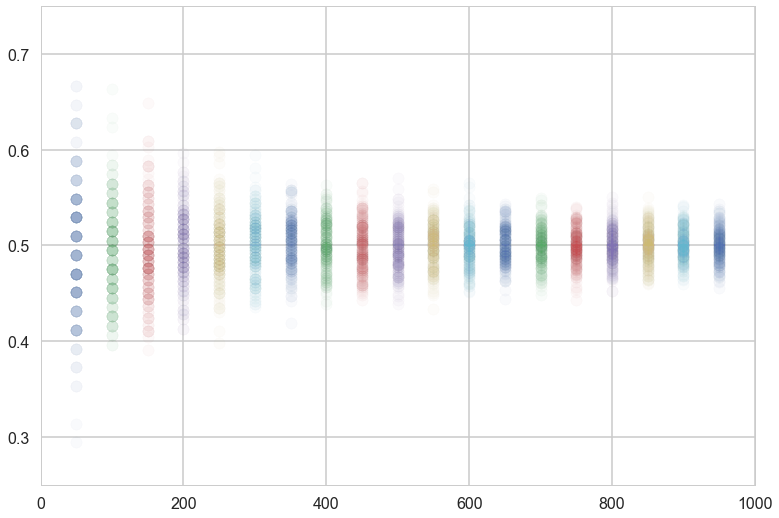

In [9]:
for i in sample_sizes:
    if i %50 ==0 and i < 1000:
        plt.scatter([i]*200, sample_means[i], alpha=0.03)
plt.xlim([0,1000])
plt.ylim([0.25,0.75])

### The variation of the sample mean

Let the underlying distribution from which we have drawn our samples have, additionally to a well defined mean $\mu$, a well defined variance $\sigma^2$. ^[The Cauchy distribution, as you know, is a well defined exception with ill defined mean and variance].

Then, as before:

$$V_{\{R\}}(N\,\bar{x}) = V_{\{R\}}(x_1 + x_2 + ... + x_N) = V_{\{R\}}(x_1) + V_{\{R\}}(x_2) + ... + V_{\{R\}}(x_N)$$

Now in the limit of a very large number of replications, each of the variances in the right hand side can be replaced by the population variance using the law of large numbers! Thus:

\begin{eqnarray*}
V_{\{R\}}(N\,\bar{x}) &=& N\, \sigma^2\\
V(\bar{x}) &=& \frac{\sigma^2}{N}
\end{eqnarray*}

This simple formula is called **De-Moivre's** formula, and explains the tell-tale triangular plots we saw above, with lots of variation at low sample sizes turning into a tight distribution at large sample size(N).

The square root of $V$, or the standard deviation of the sampling distribution of the mean (in other words, the distribution of sample means) is also called the **Standard Error**.

We can obtain the standard deviation of the sampling distribution of the mean at different sample sizes and plot it against the sample size, to confirm the $1/\sqrt(N)$ behaviour. 


In [10]:
std_of_sample_means_1000 = [np.std(means) for means in sample_means]

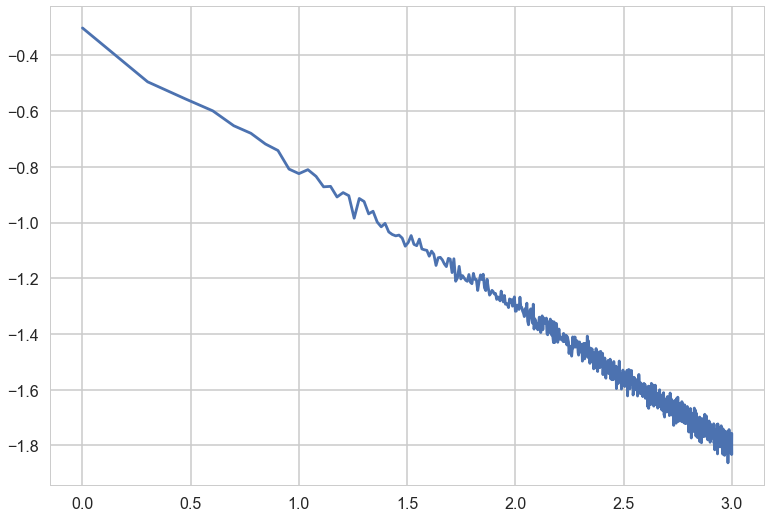

In [11]:
plt.plot(np.log10(sample_sizes), np.log10(std_of_sample_means_1000));

Let us plot again the distribution of sample means at a large sample size, $N=1000$. What distribution is this?

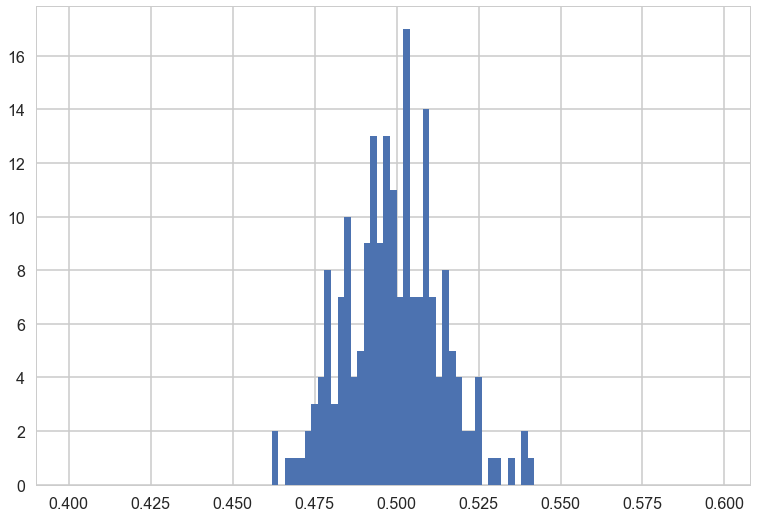

In [12]:
plt.hist(sample_means_at_size_1000, bins=np.arange(0.4,0.6,0.002))
plt.show()

Lets step back and try and think about what this all means. As an example, say I have a weight-watchers' study of 1000 people, whose average weight is 150 lbs with standard deviation of 30lbs. If I was to randomly choose many samples of 100 people each, the mean weights of those samples would cluster around 150lbs with a standard error of 30/$\sqrt{100}$ = 3lbs. Now if i gave you a different sample of 100 people with an average weight of 170lbs, this weight would be more than 6 standard errors beyond the population mean, ^[this example is motivated by the crazy bus example in Charles Whelan's excellent Naked Statistics Book] and would thus be very unlikely to be from the weight watchers group.

### The Gaussian Distribution

We saw in the last section that the sampling distribution of the mean itself has a mean $\mu$ and variance $\frac{\sigma^2}{N}$. This distribution is called the **Gaussian** or **Normal Distribution**, and is probably the most important distribution in all of statistics.

The probability density of the normal distribution is given as:

$$ N(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{(x-\mu)^2}{2s^2} } .$$

The expected value of the Gaussian distribution is $E[X]=\mu$ and the variance is $Var[X]=s^2$.

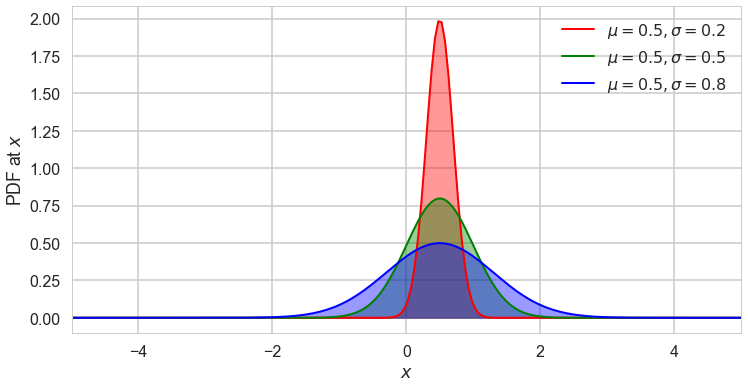

In [13]:
norm =  sp.stats.norm
x = np.linspace(-5,5, num=200)


fig = plt.figure(figsize=(12,6))
for mu, sigma, c in zip([0.5]*3, [0.2, 0.5, 0.8], ['red','green','blue']):
    plt.plot(x, norm.pdf(x, mu, sigma), lw=2, 
             c=c, label = r"$\mu = {0:.1f}, \sigma={1:.1f}$".format(mu, sigma))
    plt.fill_between(x, norm.pdf(x, mu, sigma), color=c, alpha = .4)
    
    
plt.xlim([-5,5])
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")

### The Central Limit Theorem

The reason for the distribution's importance is the Central Limit Theorem(CLT). The theorem is stated as thus, very similar to the law of large numbers:

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables from a random variable $X$. Suppose that $X$ has the finite mean $\mu$ AND finite variance $\sigma^2$. Then the average of the first n of them:**

$$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$

**converges to a Gaussian Random Variable with mean $\mu$ and variance $\sigma^2/n$ as $n \to \infty$:**

$$ S_n \sim N(\mu,\frac{\sigma^2}{n}) \, as \, n \to \infty. $$

In other words:

$$s^2 = \frac{\sigma^2}{N}.$$


This is true, *regardless* of the shape of $X$, which could be binomial, poisson, or any other distribution.

## Inference 

Just having an estimate is no good. We will want to put confidence intervals on the estimation of the parameters. This presents a conundrum: we have access to only one sample, but want to compute a error estimate over multiple samples, using an estimator such as the standard deviation.

At this point we are wishing for the Lord  to have given us those other samples drawn from the population that we talked about above. But alas, no such luck...

In the last two decades, **resampling** the ONE dataset we have has become computationally feasible. Resampling involves making new samples from the observations, each of which is analysed in the same way as out original dataset. One way to do this is the Bootstrap. 

### Bootstrap

Bootstrap tries to approximate our sampling distribution. If we knew the true parameters of the population, we could generate M fake datasets. Then we could compute the parameter (or another estimator) on each one of these, to get a empirical sampling distribution of the parameter or estimator, and which will give us an idea of how typical our sample is, and thus, how good our parameter estimations from our sample are.

But we dont have the true parameter. So we generate these samples, using the parameter we calculated. Or, alteratively, we sample with replacement the X from our original sample D, generating many fake datasets, and then compute the distribution on the parameters as before. 

We do it here for the mean of the time differences. We could also do it for its inverse, $\mu$.

#### Non Parametric bootstrap

Resample the data! We can then plot the distribution of the mean heads.

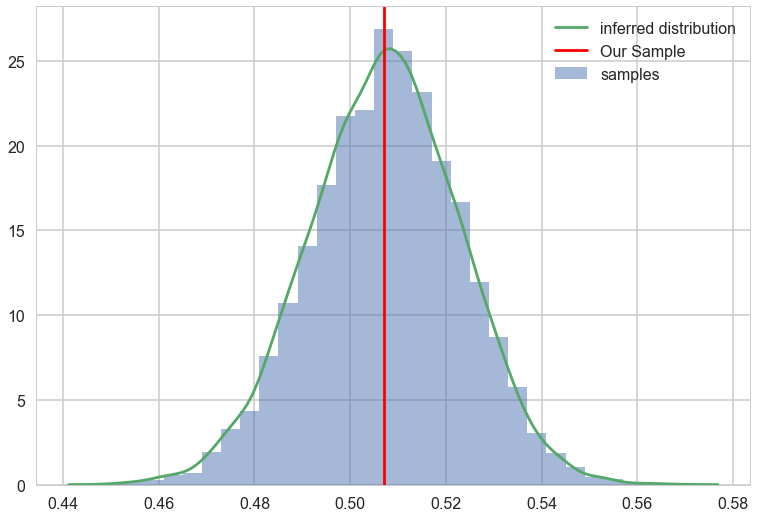

In [14]:
M_samples=10000
N_points = 1000
sample = (throw_a_coin(1000)=='H')
bs_np = np.random.choice(sample, size=(M_samples, N_points))
sd_mean=np.mean(bs_np, axis=1)
sd_std=np.std(bs_np, axis=1)
plt.hist(sd_mean, bins=30, normed=True, alpha=0.5,label="samples");
sns.kdeplot(sd_mean, label="inferred distribution")
plt.axvline(sample.mean(), 0, 1, color='r', label='Our Sample')
plt.legend()

#### Parametric Bootstrap

And here we do it in a parametric way. We get an "estimate" of the parameter from our sample, and them use the bernoulli distribution to generate many datasets, and then fir the parameter on each one of those datasets. We can then plot the distribution of the mean heads.

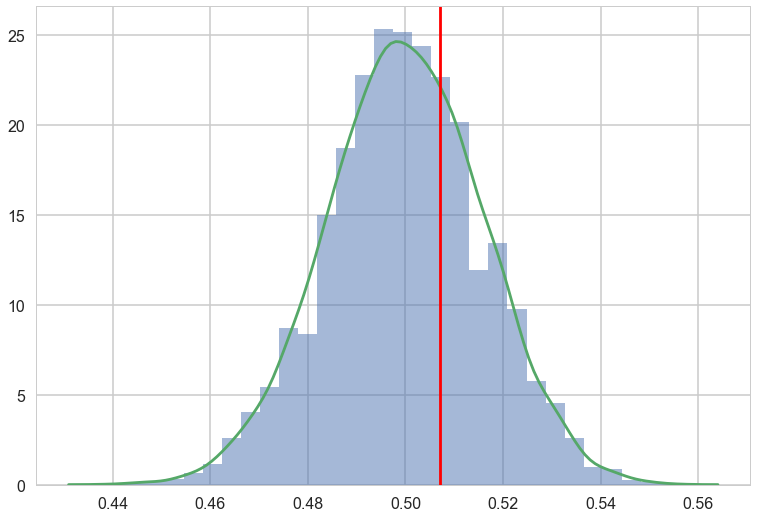

In [15]:
from scipy.stats.distributions import bernoulli
brv = bernoulli(0.5)
M_samples=10000
N_points = 1000
bs_p = brv.rvs(size=(M_samples, N_points))
sd_mean_p=np.mean(bs_p, axis=1)
sd_std_p=np.std(bs_p, axis=1)
plt.hist(sd_mean_p, bins=30, normed=True, alpha=0.5);
sns.kdeplot(sd_mean_p);
plt.axvline(sample.mean(), 0, 1, color='r', label='Our Sample')

If we are aware of the general population pdf we should rely on parametric bootstrap to get the estimate of parameters as it reduces the variance arising from the limited data we have in our sample